## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Printing the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
Twitter_data = pd.read_csv('twitter_training.csv')
Twitter_data.head()    # print the first 5 rows of the data

,Tweet_id,Subject,Reaction,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
# print the last 5 rows of the data
Twitter_data.tail()

,Tweet_id,Subject,Reaction,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [6]:
# No. of rows and columns in the dataset

Twitter_data.shape

(74682, 4)

In [7]:
Twitter_data = Twitter_data.drop('Tweet_id', axis = 1)

In [8]:
# Check the null values

Twitter_data.isnull().sum()

Subject       0
Reaction      0
Tweet       686
dtype: int64

In [11]:
Twitter_data.Tweet.mode()

0                                                     
1    At the same time, despite the fact that there ...
2    It is not the first time that the EU Commissio...
Name: Tweet, dtype: object

In [12]:
# Replace the null values with the mode of the tweet column.
Twitter_data['Tweet'] = Twitter_data['Tweet'].fillna(Twitter_data['Tweet'].mode()[1])

In [13]:
Twitter_data.isnull().sum()

Subject     0
Reaction    0
Tweet       0
dtype: int64

In [14]:
# Checking the distribution of the target column(Reaction)
Twitter_data.Reaction.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Reaction, dtype: int64

## Feature Engineering

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
Label_encoder = LabelEncoder()

In [17]:
Twitter_data['Reaction'] = Label_encoder.fit_transform(Twitter_data['Reaction'])

In [18]:
Twitter_data.Reaction.value_counts()

1    22542
3    20832
2    18318
0    12990
Name: Reaction, dtype: int64

In [19]:
reaction = ["Negative" ,"Positive", "Neutral", "Irrelevant"]
encoded_reaction = ["1","3","2","0"]

In [20]:
 encoded_values = pd.DataFrame({ "Sentiment" : reaction,
                                "Encoded_value" : encoded_reaction
    })

In [21]:
encoded_values

,Sentiment,Encoded_value
0,Negative,1
1,Positive,3
2,Neutral,2
3,Irrelevant,0


In [22]:
Twitter_data.head()

,Subject,Reaction,Tweet
0,Borderlands,3,im getting on borderlands and i will murder yo...
1,Borderlands,3,I am coming to the borders and I will kill you...
2,Borderlands,3,im getting on borderlands and i will kill you ...
3,Borderlands,3,im coming on borderlands and i will murder you...
4,Borderlands,3,im getting on borderlands 2 and i will murder ...


## Stemming  (Reduces the word to its root word)

In [23]:
port_stem = PorterStemmer()

In [24]:
def stemming(content):
    
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [25]:
Twitter_data['Stemmed_content'] = Twitter_data['Tweet'].apply(stemming)

In [26]:
Twitter_data.head()

,Subject,Reaction,Tweet,Stemmed_content
0,Borderlands,3,im getting on borderlands and i will murder yo...,im get borderland murder
1,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
3,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
4,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder


In [27]:
print(Twitter_data['Stemmed_content'])

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: Stemmed_content, Length: 74682, dtype: object


## Creating the dependent and Independent variables

In [28]:
X = Twitter_data['Stemmed_content']      # Independent Variable (Predictor)
y = Twitter_data['Reaction']            # Dependent Variable (Target)  

In [29]:
X.head()

0     im get borderland murder
1             come border kill
2       im get borderland kill
3    im come borderland murder
4     im get borderland murder
Name: Stemmed_content, dtype: object

In [76]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Reaction, dtype: int32

## Splitting the data into tarining and testing

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(74682,) (59745,) (14937,)


In [63]:
X_train

8581     good ambarkortiz mad turn bag bastion lol swee...
71534    must say everi moment fun breakpoint serv leas...
67252    busi awesomecapit johnson meyer johnson busi r...
41061    found perfect flamethrow imag scocont scohellf...
16591                     first time eu commiss taken step
                               ...                        
37194    microsoft open coronaviru threat data public c...
6265     fast pace rivet uniqu read grab copi murder pr...
54886    nah fr find shit big warzon beef dont come out...
860      borderland suck yall give money random pitchfo...
15795    trump ban eu travel month major still possibl ...
Name: Stemmed_content, Length: 59745, dtype: object

In [64]:
X_test

34877        said told u get box brain dead control player
21704                    yo look lit cs go overwatch combo
47008    homedepot attent execut administr ever store g...
7969     guy notifi say name forward litter list lmaooo...
454      f love new dlc rhandlerr rhandlerr rhandlerr p...
                               ...                        
52360    name entir favourit game videogam seven assass...
57296                   thank smurf ban player cheat cheat
35884    appar microsoft window offer free train vouche...
59060    caus actual actual checker receiv statist acti...
4740     comfi delux pant waist extend comfi clothier f...
Name: Stemmed_content, Length: 14937, dtype: object

## Convert text to numerical data

In [65]:
text_Vector = TfidfVectorizer()

In [66]:
X_train = text_Vector.fit_transform(X_train)
X_test = text_Vector.fit_transform(X_test)

In [67]:
print(X_train)

  (0, 17302)	0.3924217706988835
  (0, 17857)	0.31438583933555975
  (0, 10727)	0.24292277199852377
  (0, 1378)	0.43396796106095736
  (0, 1264)	0.34067793702687965
  (0, 19025)	0.2654105251821454
  (0, 10982)	0.28677215493945374
  (0, 513)	0.4450960596891431
  (0, 7362)	0.18158760604789295
  (1, 6679)	0.30960443676752686
  (1, 5264)	0.380801716054174
  (1, 10376)	0.2814739496735629
  (1, 16344)	0.35032010366487926
  (1, 2162)	0.2836865058035366
  (1, 6736)	0.2085247592525314
  (1, 11837)	0.5196521473351653
  (1, 5665)	0.2159420070932475
  (1, 16056)	0.20145764016254486
  (1, 12088)	0.2756234608550865
  (2, 9532)	0.2177196623101039
  (2, 3317)	0.08461427170768929
  (2, 1876)	0.2416283363274414
  (2, 15354)	0.2539481595102002
  (2, 7648)	0.2555419335079015
  (2, 5121)	0.17378826681615367
  :	:
  (59742, 3327)	0.16635685639758974
  (59742, 1672)	0.18736479901960676
  (59742, 16529)	0.15201787734936653
  (59743, 2042)	0.45807274181373553
  (59743, 13859)	0.40386274499258
  (59743, 14867)	0.3

In [68]:
print(X_test)

  (0, 9398)	0.27623173408275836
  (0, 2430)	0.3704641064940711
  (0, 2870)	0.2791464317242835
  (0, 1460)	0.45058105683776173
  (0, 1437)	0.40142730703048185
  (0, 4794)	0.22354666742498375
  (0, 12767)	0.41114632150006863
  (0, 10818)	0.3540452834457041
  (1, 2279)	0.4894699249265343
  (1, 8978)	0.31687941843549455
  (1, 4950)	0.24960216228197166
  (1, 2635)	0.3845970063034264
  (1, 7157)	0.4603586889268324
  (1, 7256)	0.27161539057843437
  (1, 14470)	0.4050746686988643
  (2, 9712)	0.22670012876140436
  (2, 9653)	0.21456367904610238
  (2, 3038)	0.23706004122855423
  (2, 8315)	0.2794344228764557
  (2, 5458)	0.13951783572213247
  (2, 7447)	0.2246122844111572
  (2, 13377)	0.13433225020614878
  (2, 3578)	0.20314050808913692
  (2, 545)	0.20314050808913692
  (2, 3335)	0.2599063831424852
  :	:
  (14934, 8695)	0.2050392187087316
  (14934, 349)	0.14971913955668112
  (14934, 13691)	0.2593721318581583
  (14934, 7115)	0.11268074661898086
  (14934, 4794)	0.1103854956861009
  (14935, 100)	0.0756927

## Training the Machine Learning Model

### Logistic Regression Model

In [69]:
LR_model = LogisticRegression()

In [70]:
LR_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [71]:
# prediction on the Training data
y_pred_train = LR_model.predict(X_train)
y_pred_train

array([3, 3, 2, ..., 1, 1, 2])

In [72]:
# Accuracy Score of the Training data
training_accuracy = accuracy_score(y_train, y_pred_train)
print(f" Accuracy of the training data is {round(training_accuracy*100,2)}%")

 Accuracy of the training data is 82.31%


In [80]:
LR_model.fit(X_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred_test = LR_model.predict(X_test)
y_pred_test

array([0, 3, 1, ..., 3, 1, 2])

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
CM_LR = confusion_matrix(y_test, y_pred_test)
CM_LR

array([[1701,  351,  207,  333],
       [  48, 4009,  219,  243],
       [  63,  431, 2734,  368],
       [  84,  374,  240, 3532]], dtype=int64)

<Axes: >

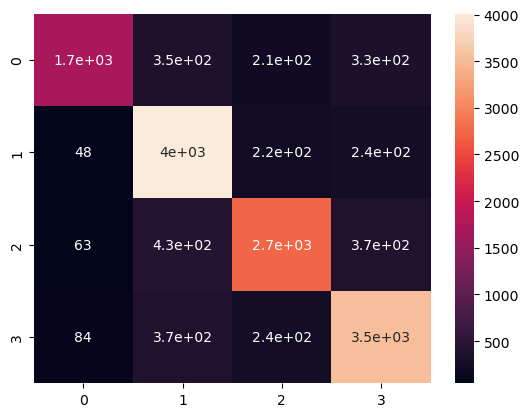

In [84]:
sns.heatmap(CM_LR, annot = True)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      2592
           1       0.78      0.89      0.83      4519
           2       0.80      0.76      0.78      3596
           3       0.79      0.83      0.81      4230

    accuracy                           0.80     14937
   macro avg       0.82      0.78      0.79     14937
weighted avg       0.81      0.80      0.80     14937



In [87]:
# Accuracy Score of the Training data
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f" Accuracy of the training data is {round(test_accuracy*100,2)}%")

 Accuracy of the training data is 80.18%


In [94]:
training_accuracy = round(training_accuracy*100,2)
test_accuracy = round(test_accuracy*100,2)

In [95]:
Model = [ "Training Accuracy", "Test Accuracy"]
Accuracy_scores =  [training_accuracy, test_accuracy]

In [96]:
Model_Accuracies = pd.DataFrame({
                                  "Model" : Model,
                                  "Scores" : Accuracy_scores
                               })

Model_Accuracies

,Model,Scores
0,Training Accuracy,82.31
1,Test Accuracy,80.18


### From above model has trained well as there is less difference in the accuracies given by train data and test data